In [ ]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Benjamin Escobar Jaramillo

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [ ]:
#Definamos nuestra función a derivar
f=lambda x: 3**x


def derivada(f,x, tol = 1e-8):
  '''
  Aproxima las derivadas con un h asociado, hasta alcanzar una tolerancia.
  Entradas:

  -f: funcion (calleable)
  -x: valor a evaluar la derivada (float)
  -tol(opcional). tolerancia

  salidas:
  los valores de todas derivadas asociadas a cada h (arraylike) (forma [derivada,h])
  '''
  n=10   #definimos esto, simplemente para... reducir el h(ver adelante)(y asi que h empieze en 0.1)


  anterior=999999999 #y con esto comparamos hasta llegar al valor de la derivada

  dev=[] #aca guardamos todas las derivadas
  hs=[]# aca guardamos todos los hches

  while True: #Mientras que no se alcance la convergencia, sigue iterando
    h=1/n                                  #aca vamos variando el h(reduciendolo!)
    derivada = (( f(x+h) - f(x-h)   )/(2*h))
    if abs(derivada-anterior)<tol:     #Si son muy smilares, llegamos a la convergencia!
      dev.append(derivada)             #Esto agregaría la aproximación Final!
      hs.append(h)
      return dev,hs                    #y aca nos saca del ciclo.

    else:
      anterior=derivada                #si no, actualizamos
      n+=10                            #agrandamos el n (lo que implica achiquitar el h)
      dev.append(derivada)             #y agregamos nuestras actuales aproximaciones
      hs.append(h)

In [ ]:
aproximado=derivada(f,2) #Perfecto! eureka, funciona!
aproximado

([9.90741213869141,
  9.89248373184406,
  9.88972069446766,
  9.888753740799991,
  9.888306198593844,
  9.888063094341195,
  9.887916511877473,
  9.88782137491846,
  9.887756149649798,
  9.887709494557217,
  9.887674975150267,
  9.887648720358442,
  9.887628287985928,
  9.887612075541714,
  9.887598996180813,
  9.887588291690008,
  9.887579420075001,
  9.887571985579164,
  9.887565693768083,
  9.887560321923772,
  9.887555699059776,
  9.887551692143557,
  9.887548196419793,
  9.887545128490984,
  9.887542421298745,
  9.887540020427252,
  9.887537881347166,
  9.887535967336412,
  9.887534247892269,
  9.887532697510526,
  9.887531294732312,
  9.887530021397595,
  9.887528862058064,
  9.88752780350131,
  9.887526834375349,
  9.887525944882789,
  9.887525126532761,
  9.887524371934369,
  9.887523674635332,
  9.887523028976375,
  9.887522429983289,
  9.887521873263426,
  9.887521354930175,
  9.887520871535962,
  9.887520420007512,
  9.887519997606464,
  9.887519601879013,
  9.88751923062579

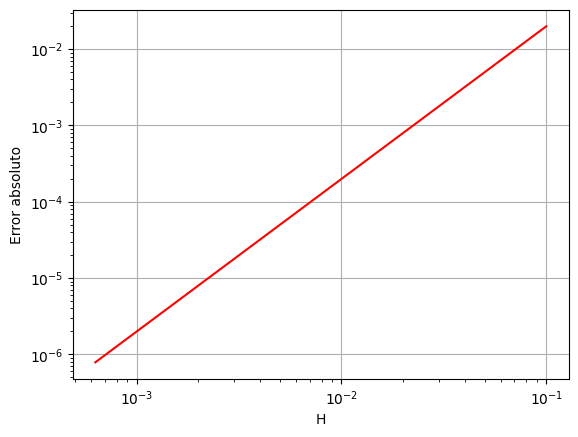

In [ ]:
'''Ahora, tenemos todos los datos que necesitamos! por lo cual, hagamos una grafica de error absoluto con los h's'''

real=(3**2) *np.log(3) #la derivada exacta (para comparar)

ejex=aproximado[1] #en este eje tenemos los h
ejey=abs(aproximado[0]-real) #y aca las diferencias (es decir el error)

plt.loglog(ejex,ejey,c='r')
plt.xlabel('H')
plt.ylabel('Error absoluto')
plt.grid()

## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



In [ ]:
#Bien, Interpolemos
r=[0.0,0.2,0.4,0.6,0.8,1.0]
vr=[2.00,1.92,1.68,1.28,0.72,0.00]  #aca tenemos nuestros datos muestra, que pueden verse como (x=r, y=vr)

#A) Expresion de lagrange.
polagrange=lagrange(r,vr)
print(polagrange)  #Como esperabamos, si tenemos n puntos, obtenemos un polinomio de grado n-1

            5             4            3     2
-2.132e-13 x + 3.979e-13 x - 1.99e-13 x - 2 x - 2.398e-14 x + 2


'Podemos notar que ambas interpolaciones tienen praticamente un comportamiengo análogo'

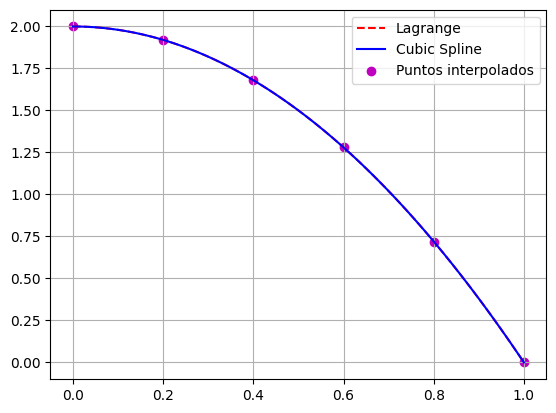

In [ ]:
#B) analogamente para splines cubicos
polcubic=CubicSpline(r,vr)
#ahora, usemos un arreglo interpolador
rinter=np.linspace(min(r),max(r),100)
#Y graficamos!

plt.plot(rinter,polagrange(rinter),label='Lagrange',ls='--',c='r')
plt.plot(rinter,polcubic(rinter),label='Cubic Spline',c='b')
plt.scatter(r,vr,c='m',label='Puntos interpolados')
plt.legend()
plt.grid()

'''Podemos notar que ambas interpolaciones tienen praticamente un comportamiengo análogo'''

Text(0, 0.5, 'Esfuerzo cortante')

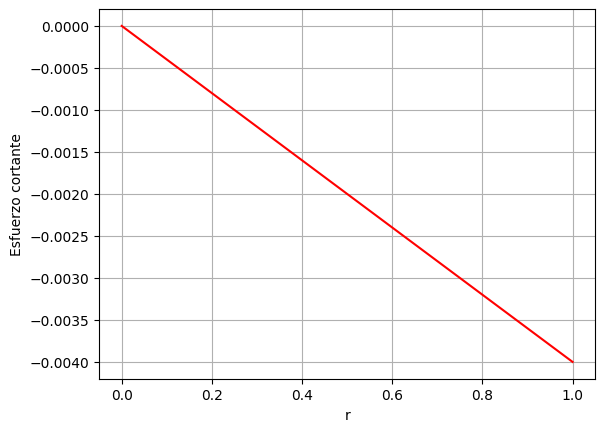

In [ ]:
### Calculemos el gradiente
h=1e-4
rh=np.arange(min(r),max(r)+h,h)  #En este arreglo, incluimos imlicitamente el paso de h!

dvdr=np.gradient(polcubic(rh),rh)  #Y finalmente,lo evaluamos con los f(x) proporcionados por polcubic, y rh (o el h)
#(note que gradiente puede recibir como segunda entrada los x, o los h. como estan equiespaciados (por h),abmas funcionan bien)

### Bien! ya obtuvimos nuestra derivada, asi que hallemos t(r)!!
#Una idea practica es hacer nuestra derivada una función, interpolando.

fdv=CubicSpline(rh,dvdr)

#Luego... ya solo definimos nuestra funcion a graficar.

mu=0.001 #Nuestro mu
rango=np.linspace(0,1,100) #Y nuestro rango

plt.plot(rango, (mu*fdv(rango)),c='r')  #el segundo parentesis es un equivalente a t(r) que es mu*dv/dr
plt.grid()
plt.xlabel('r')
plt.ylabel('Esfuerzo cortante')

Text(0, 0.5, 'Esfuerzo cortante')

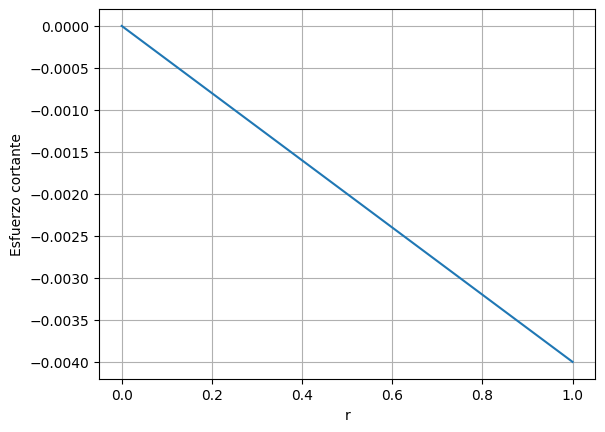

In [ ]:
'''Otra forma, sin emplear las funciones de cubic spline, es simplemente... usar los datos ya listos
lo cual, en la practica es mucho mas simple! el propósito de convertirlo en función con cubic, es poder evaluarlo
en cualquier punto del intervalo en caso de ser necesario, pero si solo debemos graficar, no es mas que...
'''

h=1e-4 #elh
rh=np.arange(min(r),max(r)+h,h)   #el intervalo h

dvdr=np.gradient(polcubic(rh),h)  #los valores (nos genera un array) (usemos esta vez h como segunda entrada para variar)

plt.plot(rh,dvdr*mu)              #y la grafica! simplemente(como dvdr esta vectorizada, multiplica el mu a c/u)
plt.grid()
plt.xlabel('r')
plt.ylabel('Esfuerzo cortante')

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [ ]:
### Bien, comencemos a integrar!
#A) La masa del solido. recordemos: p(x,y,z)=x*y*z. y dV=dz,dy,dx (cuidado con el orden!!)
'''Empecemos con quad'''

def integralz(y,x): #La interna (z) queda en función de x & y.
  integrando=lambda z: x*y*z #e integramos respecto a Z (lambda z)
  return quad(integrando,0,1-x-y)[0] #y los limites!

def integraly(x): #sigue la de y, quedará en función de x.
  integrando=lambda y: integralz(y,x) #lambda y (integramos respecto a y)de la funcion interior resultante!
  return quad(integrando,0,1-x)[0]

integralQuad=quad(integraly,0,1)[0] #Y finalmente, la externa, dx


###################################################################
'''Ahora sigue triple quad! (cuidado con el orden xy,yx!!!!)'''
f=lambda z,y,x: x*y*z #(orden apropiado)
#Ahora, definamos nuestros limites de integracion CUIDADOSAMENTE

a=0
b=1

c=0
d=lambda x: 1-x

e=0
ff=lambda x,y: 1-x-y  #Es el orden que dice la documentación tplquad, recibe f(x,y) no f(y,x)

#Y finalmente... Integrar! : )

integralTripeQuad=tplquad(f,a,b,c,d,e,ff)[0]

In [ ]:
'''
Muy bien damas y caballeros! Todo parece haber salido de maravilla. Comparemos nuestro resultado!!
'''
import pandas as pd #Solo es para visualizarl mejor

data={'Quad':[integralQuad],'Triple Quad':[integralTripeQuad],'Error absoluto':abs(integralTripeQuad-integralQuad)}
frame=pd.DataFrame(data)
frame

,Quad,Triple Quad,Error absoluto
0,0.001389,0.001389,0.0


In [ ]:
#B) Ahora, calculemos el momento de inercia.
#Como los limites de integración son iguales, y ya los separamos cuidadosamente, pues... Triplequad!

a=0
b=1

c=0
d=lambda x: 1-x

e=0
ff=lambda x,y: 1-x-y

#Nuevas funciones asociadas.

f1=lambda z,y,x: (x**2 + y**2) * (x*y*z) #Definimos sin problema...
f2=lambda z,y,x: (y**2 + z**2) * (x*y*z)

momentoz=tplquad(f1,a,b,c,d,e,ff)[0]   #y calculamos sin problema :)
momentox=tplquad(f2,a,b,c,d,e,ff)[0]

In [ ]:
print(f'El momento de inercia en z es igual a {round(momentoz,7)}, y de x será {round(momentox,7)}')

El momento de inercia en z es igual a 0.0002976, y de x será 0.0002976


In [ ]:
'''Gracioso! son iguales! Tiene relativo sentido... es simetrico...'''

In [ ]:
'''Ignorar este apartado. Solo es para confirmar los procedimientos anteriores'''

x,y,z=sp.symbols('x y z')
f=x*y*z
f2=(x**2 + y**2)*(x*y*z)
integral= sp.integrate(f, (z,0,1-x-y), (y, 0, 1-x), (x,0,1)) #calculamos cada integral
integralmomento= sp.integrate(f2, (z,0,1-x-y), (y, 0, 1-x), (x,0,1))

err1=abs(integral-integralQuad)  #y la comparamos con lo que hicimos anteriormente
err2=abs(integralmomento-momentox)
print(err1,err2) #Hurra, nimodo obtener los mismos resultados con tantos metodos! :)

0 0
